# Decision Tree Classifier - Breast Cancer

In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

cancer = datasets.load_breast_cancer()
print(f"Features: {cancer.feature_names}")
print("")
print(f"Target: {cancer.target_names}")

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


In [4]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# 0: malignant (bad), 1: benign (Not bad)

df["target"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Data Split

In [5]:
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (455, 30)
Test: (114, 30)


## Training

In [31]:
model = RandomForestClassifier(n_estimators=8,
                               n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=8, n_jobs=-1)

## Evaluation

In [32]:
model.score(X_train, y_train)

0.9956043956043956

In [33]:
model.score(X_test, y_test)

0.9649122807017544

### Confusion Matrix

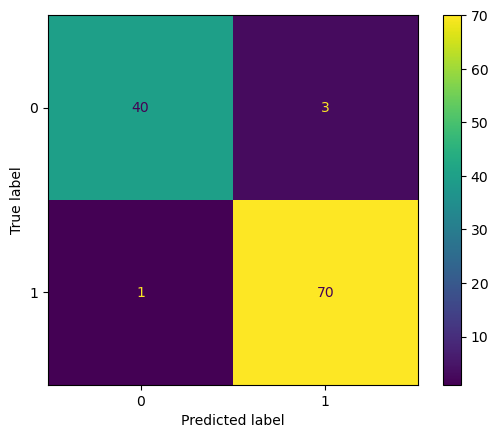

In [34]:
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## Important Features

In [35]:
model.feature_importances_

array([0.02473792, 0.01563353, 0.08127253, 0.00898417, 0.00189773,
       0.0108686 , 0.00106626, 0.23559635, 0.00804309, 0.00553638,
       0.0134096 , 0.01262902, 0.04836559, 0.00392026, 0.00141551,
       0.00426253, 0.00329587, 0.00244872, 0.01042265, 0.002925  ,
       0.11500674, 0.01971037, 0.11770821, 0.02678123, 0.00914582,
       0.00728966, 0.0140372 , 0.18008136, 0.00539054, 0.00811755])

In [36]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X_train.columns)),
                           columns=['Value','Feature'])
feature_imp

,Value,Feature
0,0.001066,mean concavity
1,0.001416,smoothness error
2,0.001898,mean smoothness
3,0.002449,concave points error
4,0.002925,fractal dimension error
5,0.003296,concavity error
6,0.003920,area error
7,0.004263,compactness error
8,0.005391,worst symmetry
9,0.005536,mean fractal dimension


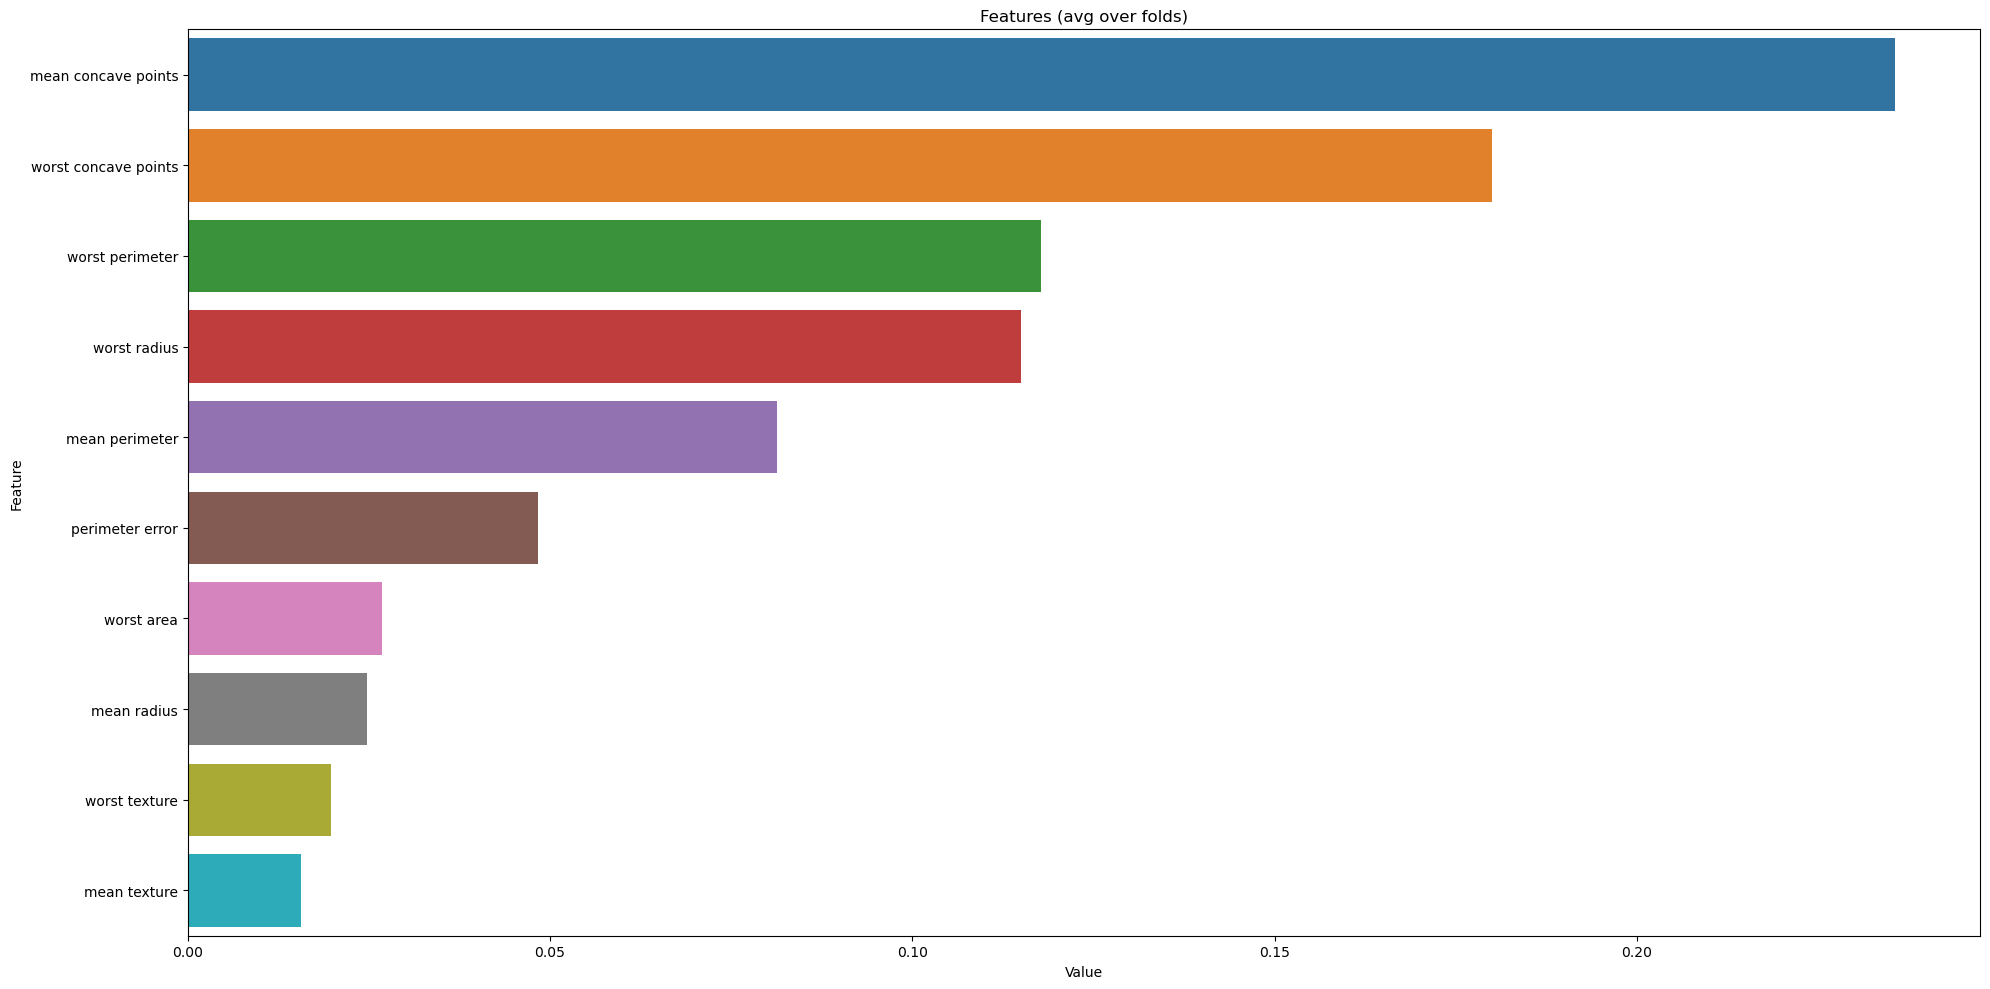

In [37]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(10))
plt.title('Features (avg over folds)')
plt.tight_layout()
plt.show()

## Visualization

In [41]:
# retrieving the 1st Tree

model_tree = model.estimators_[0]

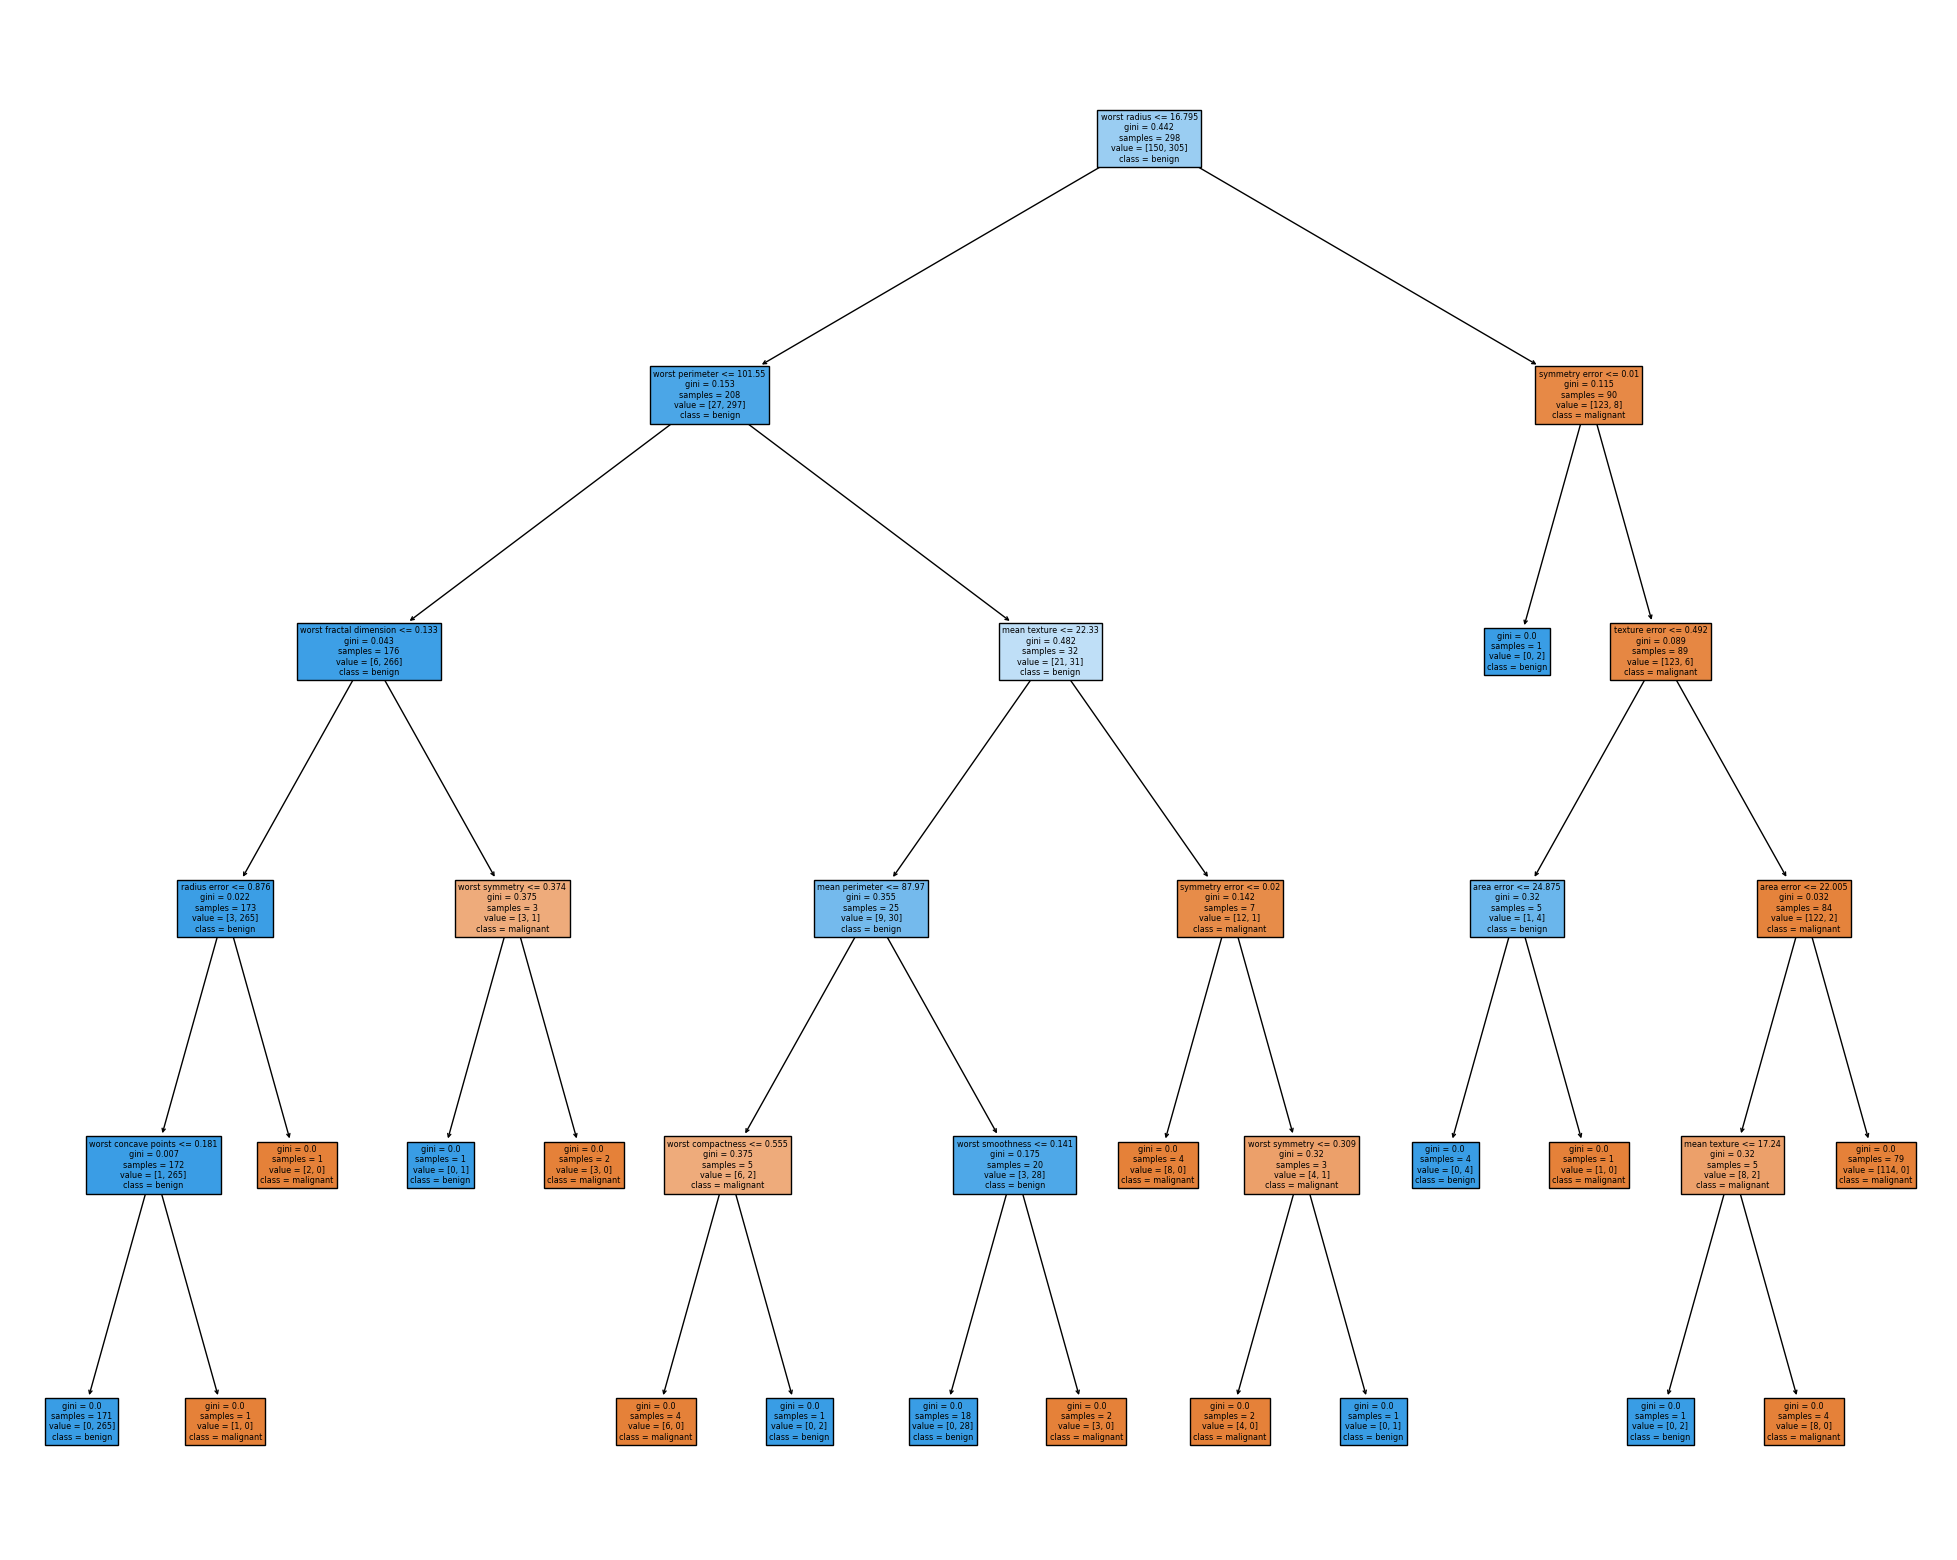

In [40]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(model_tree,
                   feature_names=cancer.feature_names,  
                   class_names=cancer.target_names,
                   filled = True)